In [39]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import pandas as pd
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [30]:
class WaterDataSet(Dataset):
    def __init__(self, path):
        super().__init__()
        self.data = np.array(pd.read_csv(path), dtype=np.float32)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        features = self.data[index, :-1]
        targets = self.data[index, -1]
        return features, targets
    
train_dataset = WaterDataSet(
    'data/water_potability/water_train.csv'
)

test_dataset = WaterDataSet(
    'data/water_potability/water_test.csv'
)

test_dataset = WaterDataSet(
    'data/water_potability/water_test.csv'
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True
)

test_dataloader = DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=False
)

In [33]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16,dtype=torch.float32)
        self.fc2 = nn.Linear(16, 8, dtype=torch.float32)
        self.fc3 = nn.Linear(8, 1, dtype=torch.float32)
        self.init_weight_()

    def init_weight_(self):
        for layer in [self.fc1, self.fc2, self.fc3]:
            nn.init.kaiming_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.sigmoid(self.fc3(x))
    
net = Net()            

In [37]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

for epoch in range(1000):
    if epoch % 10 == 0:
        print(f'Epoch {epoch}')
    for features, targets in train_dataloader:
        pred = net(features)

        loss = criterion(pred.squeeze(), targets)
        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Epoch 100
Epoch 110
Epoch 120
Epoch 130
Epoch 140
Epoch 150
Epoch 160
Epoch 170
Epoch 180
Epoch 190
Epoch 200
Epoch 210
Epoch 220
Epoch 230
Epoch 240
Epoch 250
Epoch 260
Epoch 270
Epoch 280
Epoch 290
Epoch 300
Epoch 310
Epoch 320
Epoch 330
Epoch 340
Epoch 350
Epoch 360
Epoch 370
Epoch 380
Epoch 390
Epoch 400
Epoch 410
Epoch 420
Epoch 430
Epoch 440
Epoch 450
Epoch 460
Epoch 470
Epoch 480
Epoch 490
Epoch 500
Epoch 510
Epoch 520
Epoch 530
Epoch 540
Epoch 550
Epoch 560
Epoch 570
Epoch 580
Epoch 590
Epoch 600
Epoch 610
Epoch 620
Epoch 630
Epoch 640
Epoch 650
Epoch 660
Epoch 670
Epoch 680
Epoch 690
Epoch 700
Epoch 710
Epoch 720
Epoch 730
Epoch 740
Epoch 750
Epoch 760
Epoch 770
Epoch 780
Epoch 790
Epoch 800
Epoch 810
Epoch 820
Epoch 830
Epoch 840
Epoch 850
Epoch 860
Epoch 870
Epoch 880
Epoch 890
Epoch 900
Epoch 910
Epoch 920
Epoch 930
Epoch 940
Epoch 950
Epoch 960
Epoch 970
Epoch 980
Epoch 990


Accuracy: 0.6565 (65.65%)
Correct predictions: 990/1508


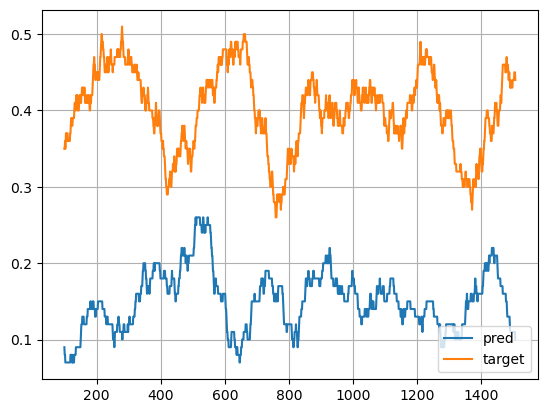

In [40]:
net.eval()

pred_arr = []
targets_arr = []

correct_predictions = 0  # Đếm số dự đoán đúng
total_predictions = 0    # Tổng số dự đoán

with torch.no_grad():
    for features, targets in test_dataloader:
        pred = net(features)
        output = (pred >= 0.5).float()
        pred_arr.extend([x.item() for x in output.view(-1)])
        targets_arr.extend([y.item() for y in targets.view(-1)])

        # Tính accuracy cho batch hiện tại
        batch_correct = (output.squeeze() == targets).sum().item()
        batch_total = targets.size(0)
        
        correct_predictions += batch_correct
        total_predictions += batch_total

def smoothen(arr, window):
    arr = pd.Series(arr)
    arr = arr.rolling(window=window).mean()
    return arr.values

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct predictions: {correct_predictions}/{total_predictions}")


fig, ax = plt.subplots()
ax.plot(smoothen(pred_arr, 100), label='pred')
ax.plot(smoothen(targets_arr, 100), label='target')
ax.grid()
ax.legend(loc='lower right')
plt.show()